## Değişkenler

**Impression** : – Reklam görüntüleme sayısı

**Click– Tıklama**: Görüntülenen reklama tıklanma sayısını belirtir.

**Purchase – Satın alım** :Tıklanan reklamlar sonrası satın alınan ürün sayısını belirtir.

**Earning – Kazanç**: Satın alınan ürünler sonrası elde edilen kazanç


Purchase kontrol ve test gruplarının karşılaştırılması:

-Mevcutta maximum_bidding kullanılmaktadır. (Kontrol Grubu)

-Yeni ürün olarak average_bidding test edilmiştir. (Test Grubu)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
%matplotlib inline
import seaborn as sns

import statsmodels.stats.api as sms
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, pearsonr, spearmanr, kendalltau, f_oneway, kruskal
from statsmodels.stats.proportion import proportions_ztest

colors = ["#033270", "#1368aa", "#4091c9", "#9dcee2", "#fedfd4", "#f29479", "#f26a4f", "#ef3c2d", "#cb1b16", "#65010c"]


In [2]:
control = pd.read_excel('ab_testing.xlsx', sheet_name= 'Control Group',usecols=[0,1,2,3])
test = pd.read_excel('ab_testing.xlsx', sheet_name= 'Test Group',usecols=[0,1,2,3])

In [19]:
control

,Impression,Click,Purchase,Earning,i/c,i/p,i/e,c/p,c/e,e/p
0,82529.459271,6090.077317,665.211255,2311.277143,13.551463,124.065037,35.707297,9.155103,2.634940,3.474501
1,98050.451926,3382.861786,315.084895,1742.806855,28.984469,311.187409,56.260079,10.736350,1.941042,5.531229
2,82696.023549,4167.965750,458.083738,1797.827447,19.840860,180.525997,45.997753,9.098698,2.318335,3.924670
3,109914.400398,4910.882240,487.090773,1696.229178,22.381803,225.654860,64.799263,10.082068,2.895176,3.482368
4,108457.762630,5987.655811,441.034050,1543.720179,18.113560,245.916982,70.257398,13.576403,3.878718,3.500229
5,77773.633900,4462.206586,519.669656,2081.851850,17.429411,149.659756,37.357910,8.586621,2.143383,4.006106
6,95110.586266,3555.580670,512.928746,1815.006614,26.749663,185.426508,52.402336,6.931919,1.958990,3.538516
7,106649.183075,4358.027043,747.020123,1965.100400,24.471896,142.766145,54.271620,5.833882,2.217712,2.630586
8,122709.716594,5091.558964,745.985682,1651.662991,24.100618,164.493394,74.294646,6.825277,3.082686,2.214068
9,79498.248658,6653.845515,470.501367,2456.304240,11.947715,168.964969,32.364984,14.142032,2.708885,5.220610


In [20]:
test

,Impression,Click,Purchase,Earning,i/c,i/p,i/e,c/p,c/e,e/p
0,120103.503796,3216.547958,702.160346,1939.611243,37.339255,171.048543,61.921431,4.580931,1.658347,2.762348
1,134775.943363,3635.082422,834.054286,2929.405820,37.076448,161.591332,46.007946,4.358328,1.240894,3.512248
2,107806.620788,3057.143560,422.934258,2526.244877,35.263840,254.901604,42.674652,7.228413,1.210153,5.973138
3,116445.275526,4650.473911,429.033535,2281.428574,25.039443,271.412993,51.040509,10.839418,2.038404,5.317600
4,145082.516838,5201.387724,749.860442,2781.697521,27.893040,193.479358,52.156108,6.936474,1.869861,3.709620
5,115923.006949,4213.868620,778.373161,2157.408552,27.509877,148.929861,53.732524,5.413687,1.953208,2.771689
6,106116.436642,3279.472973,491.614531,2560.411202,32.357771,215.852929,41.445076,6.670822,1.280838,5.208168
7,125957.116104,4690.569911,855.719803,2563.579756,26.853265,147.194345,49.133293,5.481432,1.829695,2.995817
8,117442.864652,3907.939237,660.477912,2242.232586,30.052377,177.814977,52.377646,5.916836,1.742879,3.394864
9,131271.715604,4721.187812,532.279336,2368.108569,27.804807,246.621852,55.433149,8.869756,1.993653,4.448996


In [3]:
#Çeşitli metrikler
control['i/c'] = control['Impression'] / control['Click'] 
test['i/c'] = test['Impression'] / test['Click']

control['i/p'] = control['Impression'] / control['Purchase']
test['i/p'] = test['Impression'] / test['Purchase']

control['i/e'] = control['Impression'] / control['Earning']
test['i/e'] = test['Impression'] / test['Earning']

control['c/p'] = control['Click'] / control['Purchase'] 
test['c/p'] = test['Click'] / test['Purchase']

control['c/e'] = control['Click'] / control['Earning']
test['c/e'] = test['Click'] / test['Earning']

control['e/p'] = control['Earning'] / control['Purchase']
test['e/p'] = test['Earning'] / test['Purchase']



In [4]:
control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Impression  40 non-null     float64
 1   Click       40 non-null     float64
 2   Purchase    40 non-null     float64
 3   Earning     40 non-null     float64
 4   i/c         40 non-null     float64
 5   i/p         40 non-null     float64
 6   i/e         40 non-null     float64
 7   c/p         40 non-null     float64
 8   c/e         40 non-null     float64
 9   e/p         40 non-null     float64
dtypes: float64(10)
memory usage: 3.2 KB


In [5]:
control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Impression  40 non-null     float64
 1   Click       40 non-null     float64
 2   Purchase    40 non-null     float64
 3   Earning     40 non-null     float64
 4   i/c         40 non-null     float64
 5   i/p         40 non-null     float64
 6   i/e         40 non-null     float64
 7   c/p         40 non-null     float64
 8   c/e         40 non-null     float64
 9   e/p         40 non-null     float64
dtypes: float64(10)
memory usage: 3.2 KB


In [23]:
control.describe([0.25,0.75,0.99]).T

,count,mean,std,min,25%,50%,75%,99%,max
Impression,40.0,101711.449068,20302.157862,45475.942965,85726.690349,99790.701078,115212.816543,143105.791105,147539.336329
Click,40.0,5100.657373,1329.985498,2189.753157,4124.304129,5001.220602,5923.803596,7761.795112,7959.125069
Purchase,40.0,550.894059,134.108201,267.028943,470.095533,531.206307,637.957088,790.187785,801.795020
Earning,40.0,1908.568300,302.917783,1253.989525,1685.847205,1975.160522,2119.802784,2481.308737,2497.295218
i/c,40.0,21.724069,8.252524,6.170233,17.250786,20.515688,25.502530,44.306689,48.175760
i/p,40.0,195.110871,64.405290,112.283740,151.814224,183.659595,215.360979,394.603135,447.934501
i/e,40.0,54.445746,13.571287,32.364984,45.661582,53.383726,60.387275,88.740199,93.915335
c/p,40.0,9.870742,3.917640,3.285539,6.905259,9.126900,11.730383,22.280564,24.750813
c/e,40.0,2.794170,1.081184,1.036877,1.996401,2.610938,3.341290,5.937967,5.976681
e/p,40.0,3.688075,1.137500,1.826339,2.974351,3.491217,4.082826,6.631304,6.710130


In [34]:
test.describe([0.25,0.75,0.99]).T

,count,mean,std,min,25%,50%,75%,99%,max
Impression,40.0,120512.411758,18807.448712,79033.834921,112691.970770,119291.300775,132050.578933,158245.263797,158605.920483
Click,40.0,3967.549761,923.095073,1836.629861,3376.819024,3931.359804,4660.497911,6012.877296,6019.695079
Purchase,40.0,582.106097,161.152513,311.629515,444.626828,551.355732,699.862360,876.576104,889.910460
Earning,40.0,2514.890733,282.730852,1939.611243,2280.537426,2544.666107,2761.545405,3091.940894,3171.489708
i/c,40.0,32.427867,10.519931,13.200948,26.839130,31.896839,35.516844,64.011235,67.879221
i/p,40.0,222.665199,71.381788,108.248380,173.223894,206.891716,257.959113,412.621254,440.366424
i/e,40.0,48.473386,9.096060,30.446133,42.665587,49.783544,53.746873,69.286912,72.435606
c/p,40.0,7.375428,2.759489,2.232713,5.464496,6.842107,9.070055,14.579033,15.710663
c/e,40.0,1.589185,0.388226,0.803174,1.293121,1.524573,1.815083,2.538678,2.635018
e/p,40.0,4.652949,1.361653,2.646708,3.660277,4.448843,5.514351,7.938190,8.186783


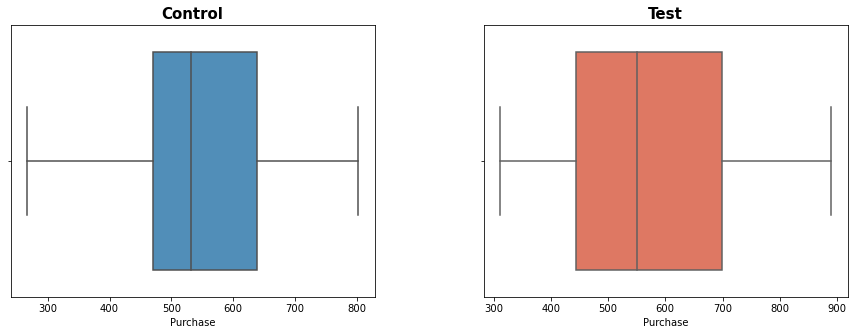

In [8]:
#outlier kontrolü
plt.subplots(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x = "Purchase", y = None, data=control, color = "#4091c9")
plt.title('Control', fontsize = 15, fontweight = "bold")

plt.subplot(1, 2, 2)
sns.boxplot(x = "Purchase", y = None, data = test, color = "#f26a4f")
plt.title('Test', fontsize = 15, fontweight = "bold")

#fig.tight_layout()
plt.subplots_adjust(wspace = 0.3)
plt.show()

C:\Users\melih.sari\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\melih.sari\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


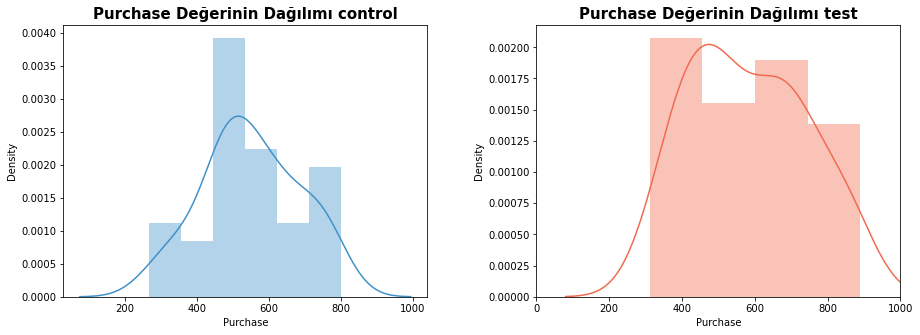

In [36]:
#dağılıma bakmak


plt.subplots(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.distplot(control["Purchase"], color = "#4091c9")
plt.title('Purchase Değerinin Dağılımı control', fontsize = 15, fontweight="bold")
plt.ylabel('Density')

plt.subplot(1, 2, 2)
sns.distplot(test["Purchase"], color = "#f26a4f")
plt.title('Purchase Değerinin Dağılımı test', fontsize = 15, fontweight="bold")
plt.ylabel('Density')
plt.xlim(0, 1000) # Görselliği bozmamak için frequency 1000 ile limitlendi.

#fig.tight_layout()
plt.subplots_adjust(wspace=0.3)

plt.show()

In [10]:
#hipotezi kurmak
#ho: iki örneklem arasında istatiksel olarak anlamlı bir farklılık yoktur.iki örneklerimin ortalamaları arasında anlamlı bir farklılık yoktur.
#h1: iki örneklem arasında istatiksel olarak anlamlı bir farklılık vardır.

In [11]:
#normallik varsayım kontrolü yapmak
#ho:normal Normallik varsayımı sağlanmaktadır.
#h1:normal Normallik varsayımı sağlananamaktadır.

In [12]:
#Control Veriseti
test_stat, pvalue = shapiro(control.loc[:, "Purchase"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

#0.5891>0.05
# Test istatistiği (P-value)>0.05'ten büyük olduğu için H0 hipotezi reddedilemez.

Test Stat = 0.9773, p-value = 0.5891


In [13]:
#Test Veriseti
test_stat, pvalue = shapiro(test["Purchase"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))
#0.1541>0.05
# Test istatistiği (P-value)>0.05'ten büyük olduğu için H0 hipotezi reddedilemez.

Test Stat = 0.9589, p-value = 0.1541


In [14]:
#Varyans homojenliği testi
#ho:Varyans homojenliği varsayımı sağlanmaktadır.
#h1:Varyans homojenliği varsayımı sağlananamaktadır.

test_stat, pvalue = levene(control["Purchase"], test["Purchase"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))
#0.1083 > 0.05
# Test istatistiği (P-value)>0.05'ten büyük olduğu için H0 hipotezi reddedilemez.

Test Stat = 2.6393, p-value = 0.1083


In [15]:
# Normallik ve Varyans homojenliği varsayımı sağlandığı için t-test yapıyoruz.
#ho: iki örneklem arasında istatiksel olarak anlamlı bir farklılık yoktur.
#h1: iki örneklem arasında istatiksel olarak anlamlı bir farklılık vardır.

test_stat, pvalue = ttest_ind(control["Purchase"], test["Purchase"], equal_var=True)
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

#0.3493 > 0.05 cannot be reject ho hypothesis
# Test istatistiği (P-value)>0.05'ten büyük olduğu için H0 hipotezi reddedilemez.

Test Stat = -0.9416, p-value = 0.3493


In [37]:
#Control Veriseti
test_stat, pvalue = shapiro(control.loc[:, "Click"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

#0.0.8461>0.05
# Test istatistiği (P-value)>0.05'ten büyük olduğu için H0 hipotezi reddedilemez.

Test Stat = 0.9844, p-value = 0.8461


In [38]:
#Test Veriseti
test_stat, pvalue = shapiro(test["Click"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))
#0.1541>0.05
# Test istatistiği (P-value)>0.05'ten büyük olduğu için H0 hipotezi reddedilemez.

Test Stat = 0.9589, p-value = 0.1541


In [39]:
#Varyans homojenliği testi
#ho:Varyans homojenliği varsayımı sağlanmaktadır.
#h1:Varyans homojenliği varsayımı sağlananamaktadır.

test_stat, pvalue = levene(control["Click"], test["Click"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))
#0.0.0141 c 0.05
# Test istatistiği (P-value)>0.05'ten büyük olduğu için H0 hipotezi reddedilebilir

Test Stat = 6.3041, p-value = 0.0141


In [44]:
# Normallik ve Varyans homojenliği varsayımı sağlandığı için t-test yapıyoruz.
#ho: iki örneklem arasında istatiksel olarak anlamlı bir farklılık yoktur.
#h1: iki örneklem arasında istatiksel olarak anlamlı bir farklılık vardır.

test_stat, pvalue = ttest_ind(control["Click"], test["Click"], equal_var=True)
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

#0.3493 > 0.05 cannot be reject ho hypothesis
# Test istatistiği (P-value)>0.05'ten büyük olduğu için H0 hipotezi reddediebilir

Test Stat = 4.4266, p-value = 0.0000


In [16]:
#click/purchase normallik kontrolü
#control
test_stat, pvalue = shapiro(control.loc[:, "c/p"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

#0.0007<0.05
# Test istatistiği (P-value)>0.05'ten büyük olduğu için H0 hipotezi reddedilebilir.

Test Stat = 0.8842, p-value = 0.0007


In [17]:
#click/purchase normallik kontrolü
#test
test_stat, pvalue = shapiro(test.loc[:, "c/p"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

# 0.1334>0.05
# Test istatistiği (P-value)>0.05'ten büyük olduğu için H0 hipotezi reddedilemez.

Test Stat = 0.9571, p-value = 0.1334


In [18]:
# Test veriseti normal dağılıma sahipken, Control veriseti normal dağılıma sahip değildir.
#Bu yüzden iki bağımsız grubu kıyaslarken parametrik dağılıma sahip olmayan Mann-WhitneyU hipotez testi kullanmılmıştır.
#ho: iki örneklem arasında istatiksel olarak anlamlı bir farklılık yoktur.
#h1: iki örneklem arasında istatiksel olarak anlamlı bir farklılık vardır.

test_stat, pvalue =  mannwhitneyu(control["c/p"], test["c/p"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))
#0.0005<0.05
# Test istatistiği (P-value)>0.05'ten büyük olduğu için H0 hipotezi reddedilebilir.

Test Stat = 459.0000, p-value = 0.0005


## Aksiyon

Click, Purchase ve Click/Purchase metrikleri üzerine hipotezler kurulup, hipotezler incelendiğinde;

--Click ve Click/Purchase metriklerinde Average Bidding yöntemi için istatiksel olarak anlamlı farklar bulunmuştur.

--Şirketin bu yönde aksiyon gerçekleştirmesi tıklanma oranlarını ve bu tıklanmaların satın alıma dönüşüm oranlarını olumlu yönde etkileyecektir.